# RLkit Getting started
In this file we will see examples of running differnet agent-algorithms, getting the train metric, and watching the agents in actions.


In [ ]:
%matplotlib inline
from Agents.dqn_agent import DQN_Agent
from Agents.ppo_agent import PPO_Agent
from Models import fc, rnn
import utils
import gymnasium as gym
device = utils.init_torch() #default goes to cuda -> cpu' or enter manualy

## Example 1 - Train using discrete PPO
lets train a LunaLander gym env

In [ ]:
env_name = "LunarLander-v2"
env = gym.make(env_name, render_mode=None)
model_class = fc.FC  # The backbone neural network
model_kwargs = {'embed_dim': 64, 'repeat':2}  # the chosen neural network args
agent = PPO_Agent(obs_space=env.observation_space, action_space=env.action_space, device=device, batch_size=1024, max_mem_size=10**5,
                num_parallel_envs=4, lr=3e-4, entropy_coeff=0.05, model_class=model_class, model_kwargs=model_kwargs, discount_factor=0.99, kl_div_thresh=0.03, clip_param=0.1)
train_stats = agent.train_n_steps(env=env,n_steps=350000)
# Saving the agent ckpt is easy
_ = agent.save_agent('lunar_ppo.pt')

### Plot rewards collected

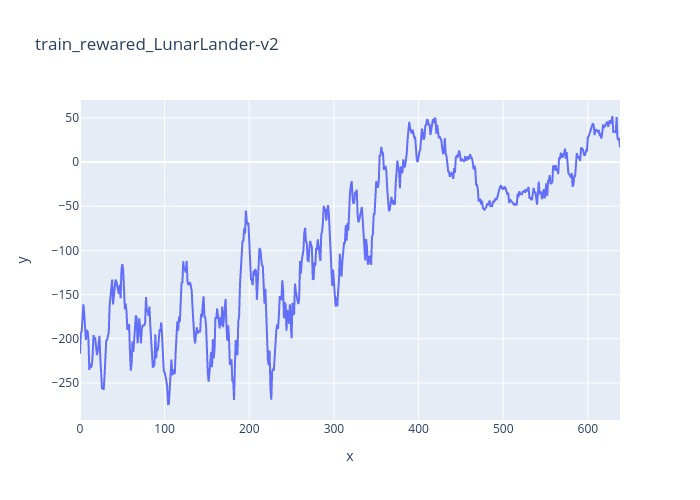

In [3]:
utils.plot_res(train_stats, 'train_rewared_'+env_name, smooth_kernel=10, render_as='jpg') #supports notebook, browser as well

### Lets see our agent in action

In [7]:
# Loading the agent ckpt is easy
agent.load_agent("lunar_ppo.pt")
env2 = gym.make("LunarLander-v2", render_mode="human")
mean_reward = agent.run_env(env2, best_act=True, num_runs=1)
print("Run Reward:", mean_reward)

Run Reward: [95.63943059]


## Example 2 - Lets use DQN now.
On CartPole

In [ ]:
env_name = "CartPole-v1"
env_c = gym.make(env_name, render_mode=None)
model_class_c = fc.FC  # The backbone neural network
model_kwargs_c = {'embed_dim': 64, 'repeat':2}  # the chosen neural network args
agent_c = DQN_Agent(obs_space=env_c.observation_space, action_space=env_c.action_space, batch_size=64, max_mem_size=10**5, num_parallel_envs=16,
                     lr=3e-4, model_class=model_class_c, model_kwargs=model_kwargs_c, discount_factor=0.99, target_update_time=10, tensorboard_dir = None)
train_stats_c = agent_c.train_n_steps(env=env_c,n_steps=100000)

episode 2880, R:00161.94, total_steps:104984: : 104984it [01:20, 1302.68it/s]                         


### Plot rewards collected

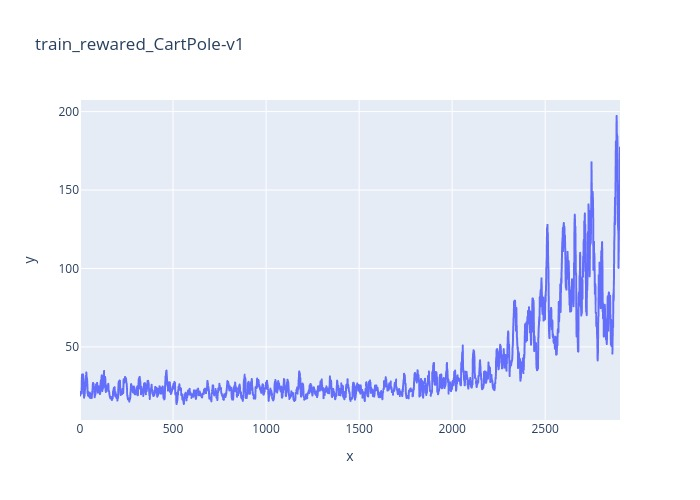

In [ ]:
utils.plot_res(train_stats_c, 'train_rewared_'+env_name, smooth_kernel=10, render_as='jpg')

### Get the metrics for out train - notice that all the metrics are also stored under ./tensorboard dir

In [ ]:
metric_df = agent_c.get_train_metrics()
metric_df.plot(backend='plotly')

### Check Our Agent

In [ ]:
env_c2 = gym.make(env_name, render_mode="human")
reward = agent_c.run_env(env_c2, best_act=True)
print("Run Reward:", reward)

Run Reward: [332.]


## Example 3 -  Lets check a reccurent policy using simple GRU

In [ ]:
env_name = "CartPole-v1"
env = gym.make(env_name, render_mode=None)
# this time we will use a simple GRU as our reccurent NN:
model_class = rnn.GRU            
model_kwargs = {'hidden_dim': 64, 'num_grus':2}
agent = PPO_Agent(obs_space=env.observation_space, action_space=env.action_space, device=device, batch_size=1024, max_mem_size=10**6, num_parallel_envs=32,
                   lr=3e-4, entropy_coeff=0.05, model_class=model_class, model_kwargs=model_kwargs, discount_factor=0.99, tensorboard_dir = None)
train_stats = agent.train_n_steps(env=env,n_steps=200000)

  0%|          | 0/200000 [00:00<?, ?it/s]

episode 1728, R:00191.41, total_steps:202816: : 202816it [02:31, 1340.65it/s]                          


### Plot rewards collected

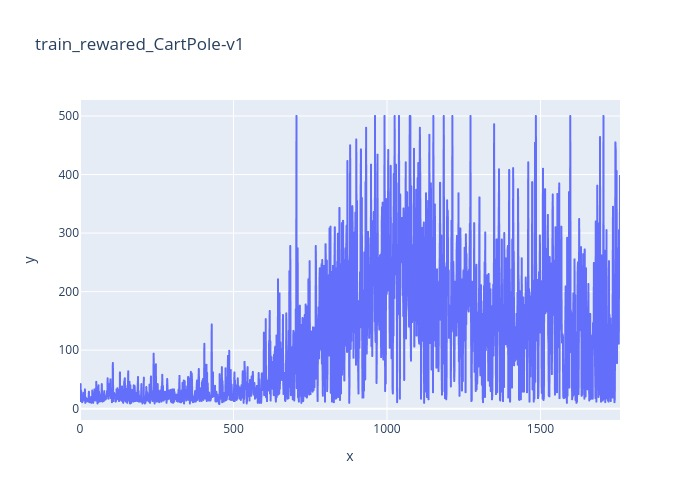

In [ ]:
utils.plot_res(train_stats, 'train_rewared_'+env_name, smooth_kernel=1, render_as='jpg') #supports browser as well

### Check Our Agent

In [ ]:
env_c2 = gym.make(env_name, render_mode="human")
reward = agent.run_env(env_c2, best_act=True, num_runs=1)
print("Run Reward:", reward)

Run Reward: [371.]


## Example 4 - A continuous action space

In [ ]:
# env_name = "LunarLanderContinuous-v2"
env_name = 'Pendulum-v1'
env = gym.make(env_name, render_mode=None)
model_class = fc.FC  # The backbone neural network
model_kwargs = {'embed_dim': 128, 'repeat':3}  # the chosen neural network args
agent = PPO_Agent(obs_space=env.observation_space, action_space=env.action_space, device=device, batch_size=1024, max_mem_size=10**5,
                   num_parallel_envs=4, lr=3e-4, entropy_coeff=0.05, model_class=model_class, model_kwargs=model_kwargs, discount_factor=0.99, tensorboard_dir = None)
train_stats = agent.train_n_steps(env=env,n_steps=250000)

episode 1248, R:-0329.33, total_steps:250400: : 250400it [02:40, 1560.60it/s]                          


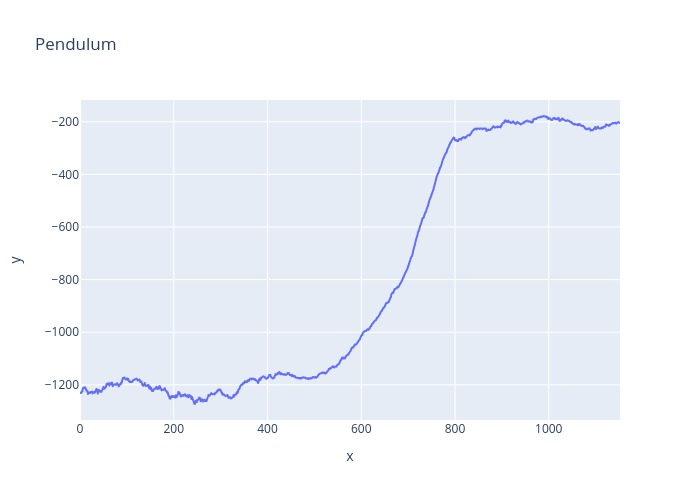

In [ ]:
utils.plot_res(train_stats, "Pendulum", 100, render_as='jpg')

In [ ]:
env_c2 = gym.make(env_name, render_mode="human")
reward = agent.run_env(env_c2, best_act=True, num_runs=1)
print("Run Reward:", reward)

Run Reward: [-122.6061014]
